In [2]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset
%matplotlib inline

In [3]:
start =pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [6]:
aapl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)

In [7]:
aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [8]:
aapl.iloc[0]

Adj. Close    52.848787
Name: 2012-01-03 00:00:00, dtype: float64

In [13]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [14]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [15]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


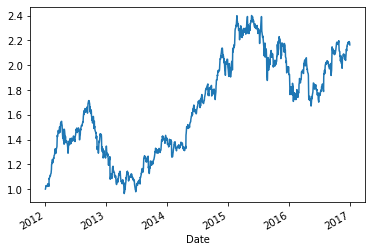

In [16]:
aapl['Normed Return'].plot()

In [17]:
# 30% in apple
# 20% in cisco
# 40% in amazon
# 10% in ibm

In [18]:
for stock_df, allo in zip((aapl, cisco, ibm, amzn), [.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [19]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [21]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Position Values'] = stock_df['Allocation'] * 100000

In [24]:
aapl

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,30000.000000
2012-01-04,53.132802,1.005374,0.301612,30161.223646
2012-01-05,53.722681,1.016536,0.304961,30496.072757
2012-01-06,54.284287,1.027162,0.308149,30814.872456
2012-01-09,54.198183,1.025533,0.307660,30765.994699
...,...,...,...,...
2016-12-23,115.080808,2.177549,0.653265,65326.461708
2016-12-27,115.811668,2.191378,0.657413,65741.339683
2016-12-28,115.317843,2.182034,0.654610,65461.016727


In [35]:
all_pos_vals = [aapl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']]

portfolio_val = pd.concat(all_pos_vals, axis=1)

In [36]:
portfolio_val.iloc[-1].sum()

184742.85181665543

In [37]:
portfolio_val

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,30000.000000,20000.000000,40000.000000,10000.000000
2012-01-04,30161.223646,20386.473430,39836.822330,9915.098028
2012-01-05,30496.072757,20311.325819,39647.879764,9920.683684
2012-01-06,30814.872456,20236.178207,39192.699946,10199.966486
2012-01-09,30765.994699,20365.002684,38988.727858,9973.747417
...,...,...,...,...
2016-12-23,65326.461708,37746.901568,40735.995561,42483.941239
2016-12-27,65741.339683,37932.359650,40841.067111,43087.750656
2016-12-28,65461.016727,37610.898975,40608.932292,43128.525945


In [38]:
portfolio_val.columns = ['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN pos']

In [39]:
portfolio_val

,AAPL Pos,CISCO Pos,IBM Pos,AMZN pos
Date,,,,
2012-01-03,30000.000000,20000.000000,40000.000000,10000.000000
2012-01-04,30161.223646,20386.473430,39836.822330,9915.098028
2012-01-05,30496.072757,20311.325819,39647.879764,9920.683684
2012-01-06,30814.872456,20236.178207,39192.699946,10199.966486
2012-01-09,30765.994699,20365.002684,38988.727858,9973.747417
...,...,...,...,...
2016-12-23,65326.461708,37746.901568,40735.995561,42483.941239
2016-12-27,65741.339683,37932.359650,40841.067111,43087.750656
2016-12-28,65461.016727,37610.898975,40608.932292,43128.525945


In [41]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

Text(0.5, 1.0, 'Total Portfolio Value')

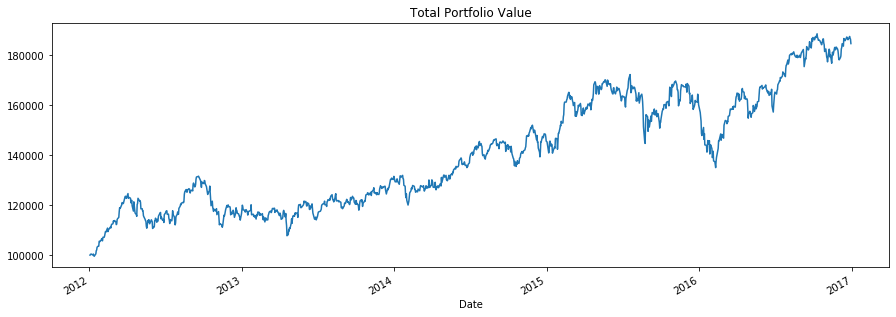

In [45]:
portfolio_val['Total Pos'].plot(figsize=(15,5))
plt.title('Total Portfolio Value')

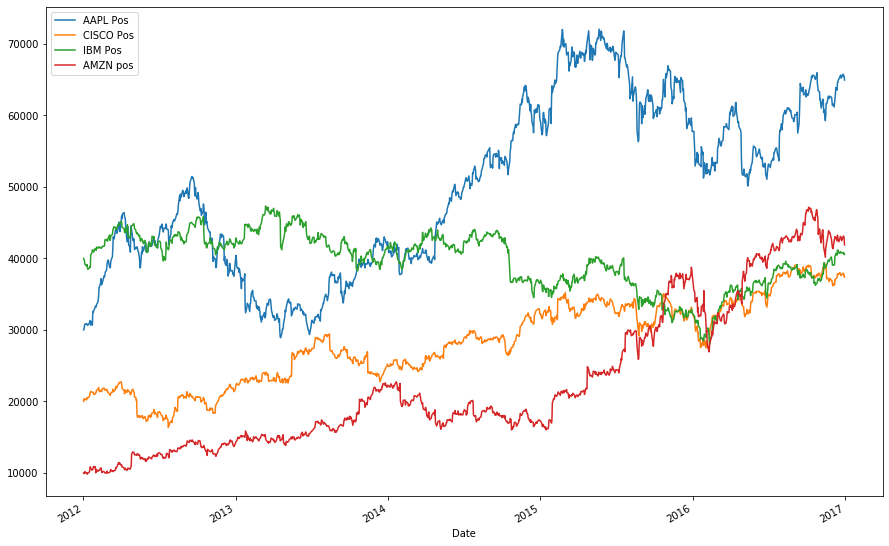

In [48]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(15,10))

In [50]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [52]:
portfolio_val['Daily Return'].mean()

0.0005442330716215256

In [53]:
portfolio_val['Daily Return'].std()

0.01056828776916172

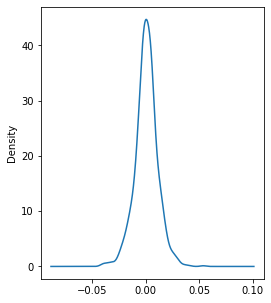

In [55]:
portfolio_val['Daily Return'].plot(kind='kde', figsize=(4,5))

In [58]:
portfolio_val.describe()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN pos,Total Pos,Daily Return
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1257.000000
mean,50035.018802,28236.110855,39713.225687,22677.999801,140662.355146,0.000544
std,11900.953169,5794.353366,3883.915833,10205.693133,22667.719653,0.010568
min,28910.105542,16370.574103,28028.564790,9826.844663,99520.464364,-0.041254
25%,39846.577247,23230.293102,36903.431639,14892.895046,120368.764338,-0.005169
50%,50625.128814,28337.718474,40672.711580,18603.585991,137296.605831,0.000626
75%,60689.888837,33164.655566,42588.950244,29828.101436,161289.029041,0.006309
max,72053.720875,39193.474605,47317.511009,47163.045300,188676.309976,0.053648


In [60]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1)

In [61]:
cumulative_return

84.74285181665542

In [62]:
 portfolio_val['Total Pos'][-1]

184742.85181665543

In [67]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [68]:
SR

0.051496806626481026

In [73]:
ASR = (252**0.5) * SR

In [74]:
ASR

0.8174864618859112